In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
plt.rc('font', family='Malgun Gothic')

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df1 = pd.read_csv('data/ÏÑúÏö∏Ïãú Î¨¥ÎçîÏúÑÏâºÌÑ∞.csv')
df1

ÏãúÏÑ§ÎÖÑÎèÑ        ÏúÑÏπòÏΩîÎìú     ÏãúÏÑ§Íµ¨Î∂Ñ1   ÏãúÏÑ§Íµ¨Î∂Ñ2         ÏâºÌÑ∞Î™ÖÏπ≠  \
0     2025  1144073000  ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        Î∞±Ìï©Í≤ΩÎ°úÎãπ   
1     2025  1144073000  ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        ÎÇôÎ£®Í≤ΩÎ°úÎãπ   
2     2025  1144073000  ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§    Î¨¥Î¶¨Ïö∏ÏÉàÎßàÏùÑÍ≤ΩÎ°úÎãπ   
3     2025  1144073000  ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        ÏÉõÌÑ∞Í≤ΩÎ°úÎãπ   
4     2025  1144073000      Í≥µÍ≥µÏãúÏÑ§    Í≥µÍ≥µÏ≤≠ÏÇ¨     ÏÑ±ÏÇ∞2ÎèôÏ£ºÎØºÏÑºÌÑ∞   
...    ...         ...       ...     ...          ...   
3798  2025  1174053000  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä  Ïã†ÌïúÏùÄÌñâÍµΩÏùÄÎã§Î¶¨Ïó≠ÏßÄÏ†ê   
3799  2025  1174053000  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä    Ïã†ÌïúÏùÄÌñâÎ™ÖÏùºÏó≠ÏßÄÏ†ê   
3800  2025  1174053000  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä   ÌïòÎÇòÏùÄÌñâÍ∞ïÎèôÏ§ëÏïôÏßÄÏ†ê   
3801  2025  1174053000  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä    Í∞ïÎèôÎÜçÌòëÎ™ÖÏùºÏó≠ÏßÄÏ†ê   
3802  2025  1174053000  ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§       ÏõêÌÑ∞Í≥®Í≤ΩÎ°úÎãπ   

                        ÎèÑÎ°úÎ™ÖÏ£ºÏÜå                   ÏßÄÎ≤àÏ£ºÏÜå    ÏãúÏÑ§Î©¥Ï†Å  Ïù¥Ïö©Í∞ÄÎä•Ïù∏Ïõê  \
0          ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ°ú 215      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô 595  122.00    36.0   
1      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú38ÎÇòÍ∏∏ 25     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Ï§ëÎèô 36-27   72.00    21.0   
2     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú 198-17    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô ÏÇ∞ 41-2  175.00    53.0   
3           ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÉàÌÑ∞ÏÇ∞2Í∏∏ 7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô 200-309  144.00    43.0   
4       ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú30Í∏∏ 22      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô 603   69.00    20.0   
...                       ...                    ...     ...     ...   
3798      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1568    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 353-2   50.00    15.0   
3799       ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Íµ¨Ï≤úÎ©¥Î°ú 427   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 315-13   50.00    15.0   
3800      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1566    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 353-3   50.00    15.0   
3801      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1655    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 306-5  200.00    61.0   
3802   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÎèôÎÇ®Î°ú65Í∏∏ 46-8       ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 236  186.30    56.0   

                                                     ÎπÑÍ≥†          Í≤ΩÎèÑ  \
0                                                   NaN  126.901103   
1                                                   NaN  126.906664   
2                                                   NaN  126.907256   
3                                                   NaN  126.907542   
4                                                   NaN  126.908982   
...                                                 ...         ...   
3798  ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  2025. 5Ïõî ÏÇ¨Ï†ÑÏ†êÍ≤Ä:...  127.143300   
3799                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.146147   
3800                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.143181   
3801                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.143875   
3802                                                NaN  127.153670   

             ÏúÑÎèÑ  XÏ¢åÌëú(EPSG:5186)  YÏ¢åÌëú(EPSG:5186)  
0     37.564513   191262.525733   551668.855561  
1     37.570611   191754.517517   552345.193318  
2     37.568913   191806.621164   552156.616667  
3     37.565137   191831.466496   551737.566410  
4     37.568578   191959.058356   552119.330878  
...         ...             ...             ...  
3798  37.545400   212663.693761   549552.604866  
3799  37.550505   212914.399091   550119.597135  
3

In [2]:
# ÏãúÏÑ§ÎÖÑÎèÑÍ∞Ä Ïãπ Îã§ 2025ÎÖÑÏù¥Îùº Î∂àÌïÑÏöî, ÏúÑÏπòÏΩîÎìú Î∂àÌïÑÏöî

df1.drop('ÏãúÏÑ§ÎÖÑÎèÑ', axis=1, inplace = True)
df1.drop('ÏúÑÏπòÏΩîÎìú', axis=1, inplace = True)
df1

ÏãúÏÑ§Íµ¨Î∂Ñ1   ÏãúÏÑ§Íµ¨Î∂Ñ2         ÏâºÌÑ∞Î™ÖÏπ≠                    ÎèÑÎ°úÎ™ÖÏ£ºÏÜå  \
0     ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        Î∞±Ìï©Í≤ΩÎ°úÎãπ       ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ°ú 215   
1     ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        ÎÇôÎ£®Í≤ΩÎ°úÎãπ   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú38ÎÇòÍ∏∏ 25   
2     ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§    Î¨¥Î¶¨Ïö∏ÏÉàÎßàÏùÑÍ≤ΩÎ°úÎãπ  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú 198-17    
3     ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        ÏÉõÌÑ∞Í≤ΩÎ°úÎãπ        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÉàÌÑ∞ÏÇ∞2Í∏∏ 7   
4         Í≥µÍ≥µÏãúÏÑ§    Í≥µÍ≥µÏ≤≠ÏÇ¨     ÏÑ±ÏÇ∞2ÎèôÏ£ºÎØºÏÑºÌÑ∞    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú30Í∏∏ 22   
...        ...     ...          ...                      ...   
3798  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä  Ïã†ÌïúÏùÄÌñâÍµΩÏùÄÎã§Î¶¨Ïó≠ÏßÄÏ†ê      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1568   
3799  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä    Ïã†ÌïúÏùÄÌñâÎ™ÖÏùºÏó≠ÏßÄÏ†ê       ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Íµ¨Ï≤úÎ©¥Î°ú 427   
3800  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä   ÌïòÎÇòÏùÄÌñâÍ∞ïÎèôÏ§ëÏïôÏßÄÏ†ê      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1566   
3801  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä    Í∞ïÎèôÎÜçÌòëÎ™ÖÏùºÏó≠ÏßÄÏ†ê      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1655   
3802  ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§       ÏõêÌÑ∞Í≥®Í≤ΩÎ°úÎãπ   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÎèôÎÇ®Î°ú65Í∏∏ 46-8    

                       ÏßÄÎ≤àÏ£ºÏÜå    ÏãúÏÑ§Î©¥Ï†Å  Ïù¥Ïö©Í∞ÄÎä•Ïù∏Ïõê  \
0         ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô 595  122.00    36.0   
1        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Ï§ëÎèô 36-27   72.00    21.0   
2      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô ÏÇ∞ 41-2  175.00    53.0   
3     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô 200-309  144.00    43.0   
4         ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÑ±ÏÇ∞Îèô 603   69.00    20.0   
...                     ...     ...     ...   
3798    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 353-2   50.00    15.0   
3799   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 315-13   50.00    15.0   
3800    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 353-3   50.00    15.0   
3801    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 306-5  200.00    61.0   
3802      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Î™ÖÏùºÎèô 236  186.30    56.0   

                                                     ÎπÑÍ≥†          Í≤ΩÎèÑ  \
0                                                   NaN  126.901103   
1                                                   NaN  126.906664   
2                                                   NaN  126.907256   
3                                                   NaN  126.907542   
4                                                   NaN  126.908982   
...                                                 ...         ...   
3798  ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  2025. 5Ïõî ÏÇ¨Ï†ÑÏ†êÍ≤Ä:...  127.143300   
3799                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.146147   
3800                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.143181   
3801                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.143875   
3802                                                NaN  127.153670   

             ÏúÑÎèÑ  XÏ¢åÌëú(EPSG:5186)  YÏ¢åÌëú(EPSG:5186)  
0     37.564513   191262.525733   551668.855561  
1     37.570611   191754.517517   552345.193318  
2     37.568913   191806.621164   552156.616667  
3     37.565137   191831.466496   551737.566410  
4     37.568578   191959.058356   552119.330878  
...         ...             ...             ...  
3798  37.545400   212663.693761   549552.604866  
3799  37.550505   212914.399091   550119.597135  
3800  37.545225   212653.198189   549533.199231  
3801  37.553562   212713.121286   550458.567012  
3802  37.548164   213579.600744   549860.800816  

[3803 rows x 12 columns]

In [3]:
# Í≤∞Ï∏°Ïπò ÏûàÎäîÏßÄ ÌôïÏù∏

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ÏãúÏÑ§Íµ¨Î∂Ñ1           3803 non-null   object 
 1   ÏãúÏÑ§Íµ¨Î∂Ñ2           3803 non-null   object 
 2   ÏâºÌÑ∞Î™ÖÏπ≠            3803 non-null   object 
 3   ÎèÑÎ°úÎ™ÖÏ£ºÏÜå           3750 non-null   object 
 4   ÏßÄÎ≤àÏ£ºÏÜå            3803 non-null   object 
 5   ÏãúÏÑ§Î©¥Ï†Å            3076 non-null   object 
 6   Ïù¥Ïö©Í∞ÄÎä•Ïù∏Ïõê          3027 non-null   float64
 7   ÎπÑÍ≥†              477 non-null    object 
 8   Í≤ΩÎèÑ              3803 non-null   float64
 9   ÏúÑÎèÑ              3803 non-null   float64
 10  XÏ¢åÌëú(EPSG:5186)  3803 non-null   float64
 11  YÏ¢åÌëú(EPSG:5186)  3803 non-null   float64
dtypes: float64(5), object(7)
memory usage: 356.7+ KB


In [4]:
# ÏûêÏπòÍµ¨ Ï∂îÏ∂ú
# ÎèÑÎ°úÎ™ÖÏ£ºÏÜåÎäî Í≤∞Ï∏°ÏπòÍ∞Ä ÎßéÏùå...ÏßÄÎ≤àÏ£ºÏÜåÎ°ú ÏßÑÌñâ

gu = []
for i in df1['ÏßÄÎ≤àÏ£ºÏÜå']:
    i = i.split(' ')[1]
    gu.append(i)
df1['ÏûêÏπòÍµ¨'] = gu
df1.drop('ÏßÄÎ≤àÏ£ºÏÜå', axis = 1 ,inplace=True)
df1

ÏãúÏÑ§Íµ¨Î∂Ñ1   ÏãúÏÑ§Íµ¨Î∂Ñ2         ÏâºÌÑ∞Î™ÖÏπ≠                    ÎèÑÎ°úÎ™ÖÏ£ºÏÜå    ÏãúÏÑ§Î©¥Ï†Å  Ïù¥Ïö©Í∞ÄÎä•Ïù∏Ïõê  \
0     ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        Î∞±Ìï©Í≤ΩÎ°úÎãπ       ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ°ú 215  122.00    36.0   
1     ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        ÎÇôÎ£®Í≤ΩÎ°úÎãπ   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú38ÎÇòÍ∏∏ 25   72.00    21.0   
2     ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§    Î¨¥Î¶¨Ïö∏ÏÉàÎßàÏùÑÍ≤ΩÎ°úÎãπ  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú 198-17   175.00    53.0   
3     ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§        ÏÉõÌÑ∞Í≤ΩÎ°úÎãπ        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏÉàÌÑ∞ÏÇ∞2Í∏∏ 7  144.00    43.0   
4         Í≥µÍ≥µÏãúÏÑ§    Í≥µÍ≥µÏ≤≠ÏÇ¨     ÏÑ±ÏÇ∞2ÎèôÏ£ºÎØºÏÑºÌÑ∞    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÏõîÎìúÏªµÎ∂ÅÎ°ú30Í∏∏ 22   69.00    20.0   
...        ...     ...          ...                      ...     ...     ...   
3798  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä  Ïã†ÌïúÏùÄÌñâÍµΩÏùÄÎã§Î¶¨Ïó≠ÏßÄÏ†ê      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1568   50.00    15.0   
3799  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä    Ïã†ÌïúÏùÄÌñâÎ™ÖÏùºÏó≠ÏßÄÏ†ê       ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ Íµ¨Ï≤úÎ©¥Î°ú 427   50.00    15.0   
3800  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä   ÌïòÎÇòÏùÄÌñâÍ∞ïÎèôÏ§ëÏïôÏßÄÏ†ê      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1566   50.00    15.0   
3801  ÏÉùÌôúÎ∞ÄÏ∞©ÎØºÍ∞ÑÏãúÏÑ§    Í∏àÏúµÍ∏∞Í¥Ä    Í∞ïÎèôÎÜçÌòëÎ™ÖÏùºÏó≠ÏßÄÏ†ê      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÏñëÏû¨ÎåÄÎ°ú 1655  200.00    61.0   
3802  ÌäπÏ†ïÍ≥ÑÏ∏µÏù¥Ïö©ÏãúÏÑ§  ÌöåÏõêÏù¥Ïö©ÏãúÏÑ§       ÏõêÌÑ∞Í≥®Í≤ΩÎ°úÎãπ   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÎèôÎÇ®Î°ú65Í∏∏ 46-8   186.30    56.0   

                                                     ÎπÑÍ≥†          Í≤ΩÎèÑ  \
0                                                   NaN  126.901103   
1                                                   NaN  126.906664   
2                                                   NaN  126.907256   
3                                                   NaN  126.907542   
4                                                   NaN  126.908982   
...                                                 ...         ...   
3798  ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  2025. 5Ïõî ÏÇ¨Ï†ÑÏ†êÍ≤Ä:...  127.143300   
3799                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.146147   
3800                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.143181   
3801                     ÏãúÏÑ§ Ïö¥ÏòÅÏãúÍ∞Ñ ÎÇ¥ ÏâºÌÑ∞ ÌÉÑÎ†•Ï†Å Ïö¥ÏòÅ(Í≥µÌú¥Ïùº Îì± ÎØ∏Ïö¥ÏòÅ)  127.143875   
3802                                                NaN  127.153670   

             ÏúÑÎèÑ  XÏ¢åÌëú(EPSG:5186)  YÏ¢åÌëú(EPSG:5186)  ÏûêÏπòÍµ¨  
0     37.564513   191262.525733   551668.855561  ÎßàÌè¨Íµ¨  
1     37.570611   191754.517517   552345.193318  ÎßàÌè¨Íµ¨  
2     37.568913   191806.621164   552156.616667  ÎßàÌè¨Íµ¨  
3     37.565137   191831.466496   551737.566410  ÎßàÌè¨Íµ¨  
4     37.568578   191959.058356   552119.330878  ÎßàÌè¨Íµ¨  
...         ...             ...             ...  ...  
3798  37.545400   212663.693761   549552.604866  Í∞ïÎèôÍµ¨  
3799  37.550505   212914.399091   550119.597135  Í∞ïÎèôÍµ¨  
3800  37.545225   212653.198189   549533.199231  Í∞ïÎèôÍµ¨  
3801  37.553562   212713.121286   550458.567012  Í∞ïÎèôÍµ¨  
3802  37.548164   213579.600744   549860.800816  Í∞ïÎèôÍµ¨  

[3803 rows x 12 columns]

In [5]:
# ÏûêÏπòÍµ¨Î≥Ñ Î¨¥ÎçîÏúÑÏâºÌÑ∞ Ïàò

gu_count = df1['ÏûêÏπòÍµ¨'].value_counts()
gu_count

ÏûêÏπòÍµ¨
ÎÖ∏ÏõêÍµ¨     290
ÏÑ±Î∂ÅÍµ¨     261
Íµ¨Î°úÍµ¨     251
Í∞ïÎèôÍµ¨     224
ÏÑ±ÎèôÍµ¨     214
ÏùÄÌèâÍµ¨     198
ÏñëÏ≤úÍµ¨     195
ÏÜ°ÌååÍµ¨     187
ÏòÅÎì±Ìè¨Íµ¨    185
Í∞ïÏÑúÍµ¨     177
ÎèôÏûëÍµ¨     167
ÎèÑÎ¥âÍµ¨     166
Ï§ëÎûëÍµ¨     154
ÏÑúÎåÄÎ¨∏Íµ¨    134
Í¥ÄÏïÖÍµ¨     134
ÏÑúÏ¥àÍµ¨     107
Í∞ïÎÇ®Íµ¨     104
Í¥ëÏßÑÍµ¨     102
Í∏àÏ≤úÍµ¨      91
Í∞ïÎ∂ÅÍµ¨      90
Ïö©ÏÇ∞Íµ¨      86
ÎßàÌè¨Íµ¨      82
ÎèôÎåÄÎ¨∏Íµ¨     70
Ï¢ÖÎ°úÍµ¨      67
Ï§ëÍµ¨       67
Name: count, dtype: int64

In [6]:
# Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨

gu_count = gu_count.sort_values()
gu_count

ÏûêÏπòÍµ¨
Ï§ëÍµ¨       67
Ï¢ÖÎ°úÍµ¨      67
ÎèôÎåÄÎ¨∏Íµ¨     70
ÎßàÌè¨Íµ¨      82
Ïö©ÏÇ∞Íµ¨      86
Í∞ïÎ∂ÅÍµ¨      90
Í∏àÏ≤úÍµ¨      91
Í¥ëÏßÑÍµ¨     102
Í∞ïÎÇ®Íµ¨     104
ÏÑúÏ¥àÍµ¨     107
Í¥ÄÏïÖÍµ¨     134
ÏÑúÎåÄÎ¨∏Íµ¨    134
Ï§ëÎûëÍµ¨     154
ÎèÑÎ¥âÍµ¨     166
ÎèôÏûëÍµ¨     167
Í∞ïÏÑúÍµ¨     177
ÏòÅÎì±Ìè¨Íµ¨    185
ÏÜ°ÌååÍµ¨     187
ÏñëÏ≤úÍµ¨     195
ÏùÄÌèâÍµ¨     198
ÏÑ±ÎèôÍµ¨     214
Í∞ïÎèôÍµ¨     224
Íµ¨Î°úÍµ¨     251
ÏÑ±Î∂ÅÍµ¨     261
ÎÖ∏ÏõêÍµ¨     290
Name: count, dtype: int64

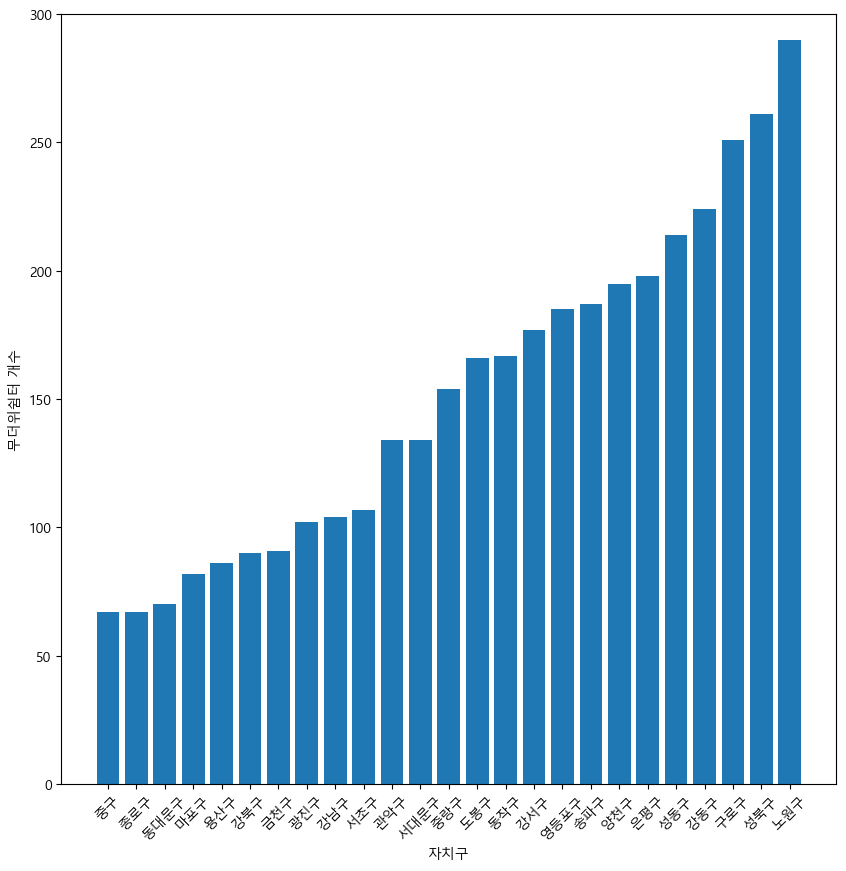

In [7]:
# Í∞ÄÏÑ§ 1. ÏûêÏπòÍµ¨Î≥ÑÎ°ú Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàòÍ∞Ä ÎπÑÎì±ÎπÑÎì±Ìï† Í≤ÉÏù¥Îã§.
# ÏûêÏπòÍµ¨Î≥ÑÎ°ú Ï∞®Ïù¥Í∞Ä ÍΩ§ ÎßéÏù¥ ÎÇ®! (max: ÎÖ∏ÏõêÍµ¨ 290Í∞ú, min: Ï§ëÍµ¨ 67Í∞ú)
# Ï§ëÍµ¨Îäî ÏôúÏù¥Î†áÍ≤å Ï†ÅÏùÑÍπå? ÎÖ∏ÏõêÍµ¨Îäî Ïôú ÎßéÏùÑÍπå? Ïì∏Îç∞ÏóÜÏù¥ ÎßéÏùÄ Í±∞ ÏïÑÎãêÍπå?

plt.figure(figsize=(10,10))
plt.bar(gu_count.index, gu_count)
plt.ylim(0,300)
plt.xticks(rotation = 45)
plt.xlabel('ÏûêÏπòÍµ¨')
plt.ylabel('Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò')
plt.show()

In [8]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú

population = pd.read_csv('data/Í≥†Î†πÏûêÌòÑÌô©_20250720105739.csv')
population

ÎèôÎ≥Ñ(1)  ÎèôÎ≥Ñ(2) 2025 1/4 2025 1/4.1 2025 1/4.2 2025 1/4.3 2025 1/4.4  \
0   ÎèôÎ≥Ñ(1)  ÎèôÎ≥Ñ(2)     Ï†ÑÏ≤¥Ïù∏Íµ¨       Ï†ÑÏ≤¥Ïù∏Íµ¨       Ï†ÑÏ≤¥Ïù∏Íµ¨   65ÏÑ∏Ïù¥ÏÉÅ Ïù∏Íµ¨   65ÏÑ∏Ïù¥ÏÉÅ Ïù∏Íµ¨   
1   ÎèôÎ≥Ñ(1)  ÎèôÎ≥Ñ(2)       ÏÜåÍ≥Ñ         ÎÇ®Ïûê         Ïó¨Ïûê         ÏÜåÍ≥Ñ         ÎÇ®Ïûê   
2   ÎèôÎ≥Ñ(1)  ÎèôÎ≥Ñ(2)       ÏÜåÍ≥Ñ         ÏÜåÍ≥Ñ         ÏÜåÍ≥Ñ         ÏÜåÍ≥Ñ         ÏÜåÍ≥Ñ   
3      Ìï©Í≥Ñ     ÏÜåÍ≥Ñ  9602826    4619922    4982904    1853676     821622   
4      Ìï©Í≥Ñ    Ï¢ÖÎ°úÍµ¨   149478      71233      78245      30242      13675   
5      Ìï©Í≥Ñ     Ï§ëÍµ¨   130418      62608      67810      27148      12083   
6      Ìï©Í≥Ñ    Ïö©ÏÇ∞Íµ¨   216537     104052     112485      39856      17612   
7      Ìï©Í≥Ñ    ÏÑ±ÎèôÍµ¨   281062     135357     145705      51907      22982   
8      Ìï©Í≥Ñ    Í¥ëÏßÑÍµ¨   348660     165870     182790      60780      27169   
9      Ìï©Í≥Ñ   ÎèôÎåÄÎ¨∏Íµ¨   361950     174523     187427      70498      31419   
10     Ìï©Í≥Ñ    Ï§ëÎûëÍµ¨   384320     187474     196846      84905      38254   
11     Ìï©Í≥Ñ    ÏÑ±Î∂ÅÍµ¨   433569     206181     227388      84607      36563   
12     Ìï©Í≥Ñ    Í∞ïÎ∂ÅÍµ¨   288797     138339     150458      72369      31101   
13     Ìï©Í≥Ñ    ÎèÑÎ¥âÍµ¨   305391     147129     158262      75363      33541   
14     Ìï©Í≥Ñ    ÎÖ∏ÏõêÍµ¨   495111     236842     258269     101968      43276   
15     Ìï©Í≥Ñ    ÏùÄÌèâÍµ¨   464466     219425     245041      99434      42782   
16     Ìï©Í≥Ñ   ÏÑúÎåÄÎ¨∏Íµ¨   318085     147743     170342      60956      26147   
17     Ìï©Í≥Ñ    ÎßàÌè¨Íµ¨   371852     171696     200156      60795      25601   
18     Ìï©Í≥Ñ    ÏñëÏ≤úÍµ¨   432901     210639     222262      81753      36778   
19     Ìï©Í≥Ñ    Í∞ïÏÑúÍµ¨   560094     267524     292570     109257      48111   
20     Ìï©Í≥Ñ    Íµ¨Î°úÍµ¨   410727     202204     208523      85391      38549   
21     Ìï©Í≥Ñ    Í∏àÏ≤úÍµ¨   238431     119999     118432      48898      22527   
22     Ìï©Í≥Ñ   ÏòÅÎì±Ìè¨Íµ¨   396834     194829     202005      71660      32740   
23     Ìï©Í≥Ñ    ÎèôÏûëÍµ¨   386897     185835     201062      74258      32345   
24     Ìï©Í≥Ñ    Í¥ÄÏïÖÍµ¨   497213     248254     248959      90299      40046   
25     Ìï©Í≥Ñ    ÏÑúÏ¥àÍµ¨   412715     196069     216646      69429      31247   
26     Ìï©Í≥Ñ    Í∞ïÎÇ®Íµ¨   563189     269014     294175      92668      41511   
27     Ìï©Í≥Ñ    ÏÜ°ÌååÍµ¨   654127     313294     340833     115654      52989   
28     Ìï©Í≥Ñ    Í∞ïÎèôÍµ¨   500002     243789     256213      93581      42574   

   2025 1/4.5 2025 1/4.6 2025 1/4.7 2025 1/4.8 2025 1/4.9 2025 1/4.10  \
0    65ÏÑ∏Ïù¥ÏÉÅ Ïù∏Íµ¨   65ÏÑ∏Ïù¥ÏÉÅ Ïù∏Íµ¨   65ÏÑ∏Ïù¥ÏÉÅ Ïù∏Íµ¨   65ÏÑ∏Ïù¥ÏÉÅ Ïù∏Íµ¨   65ÏÑ∏Ïù¥ÏÉÅ Ïù∏Íµ¨    65ÏÑ∏Ïù¥ÏÉÅ Ïù∏Íµ¨   
1          Ïó¨Ïûê        ÎÇ¥Íµ≠Ïù∏        ÎÇ¥Íµ≠Ïù∏        ÎÇ¥Íµ≠Ïù∏      Îì±Î°ùÏô∏Íµ≠Ïù∏       Îì±Î°ùÏô∏Íµ≠Ïù∏   
2          ÏÜåÍ≥Ñ         ÏÜåÍ≥Ñ         ÎÇ®Ïûê         Ïó¨Ïûê         ÏÜåÍ≥Ñ          ÎÇ®Ïûê   
3     1032054    1840543     814687    1025856      13133        6935   
4       16567      29935      13517      16418        307         158   
5       15065      26667      11837      14830        481         246   
6       22244      39258      17282      21976        598         330   
7       28925      51677      22853      28824        230         129   
8       33611      60281      26924      33357        499         245   
9       39079      70188      31269      38919        310         150   
10      46651      84680      38167      46513        225          87   
11      48044      84360      36438      47922        247         125   
12      41268      72157      31010      41147        212          91   
13      41822      75276      33504      41772         87          37   
14      58692     101838      43217      58621        130          59   
15      56652      99144      42638      56506        290         144   
16      34809      60374      25858      34516        582         28

In [9]:
# Î∂àÌïÑÏöîÌïú 1~3Î≤àÏß∏ Ìñâ Ï†úÍ±∞

population.drop(population.index[0:4], inplace = True)
population

ÎèôÎ≥Ñ(1) ÎèôÎ≥Ñ(2) 2025 1/4 2025 1/4.1 2025 1/4.2 2025 1/4.3 2025 1/4.4  \
4     Ìï©Í≥Ñ   Ï¢ÖÎ°úÍµ¨   149478      71233      78245      30242      13675   
5     Ìï©Í≥Ñ    Ï§ëÍµ¨   130418      62608      67810      27148      12083   
6     Ìï©Í≥Ñ   Ïö©ÏÇ∞Íµ¨   216537     104052     112485      39856      17612   
7     Ìï©Í≥Ñ   ÏÑ±ÎèôÍµ¨   281062     135357     145705      51907      22982   
8     Ìï©Í≥Ñ   Í¥ëÏßÑÍµ¨   348660     165870     182790      60780      27169   
9     Ìï©Í≥Ñ  ÎèôÎåÄÎ¨∏Íµ¨   361950     174523     187427      70498      31419   
10    Ìï©Í≥Ñ   Ï§ëÎûëÍµ¨   384320     187474     196846      84905      38254   
11    Ìï©Í≥Ñ   ÏÑ±Î∂ÅÍµ¨   433569     206181     227388      84607      36563   
12    Ìï©Í≥Ñ   Í∞ïÎ∂ÅÍµ¨   288797     138339     150458      72369      31101   
13    Ìï©Í≥Ñ   ÎèÑÎ¥âÍµ¨   305391     147129     158262      75363      33541   
14    Ìï©Í≥Ñ   ÎÖ∏ÏõêÍµ¨   495111     236842     258269     101968      43276   
15    Ìï©Í≥Ñ   ÏùÄÌèâÍµ¨   464466     219425     245041      99434      42782   
16    Ìï©Í≥Ñ  ÏÑúÎåÄÎ¨∏Íµ¨   318085     147743     170342      60956      26147   
17    Ìï©Í≥Ñ   ÎßàÌè¨Íµ¨   371852     171696     200156      60795      25601   
18    Ìï©Í≥Ñ   ÏñëÏ≤úÍµ¨   432901     210639     222262      81753      36778   
19    Ìï©Í≥Ñ   Í∞ïÏÑúÍµ¨   560094     267524     292570     109257      48111   
20    Ìï©Í≥Ñ   Íµ¨Î°úÍµ¨   410727     202204     208523      85391      38549   
21    Ìï©Í≥Ñ   Í∏àÏ≤úÍµ¨   238431     119999     118432      48898      22527   
22    Ìï©Í≥Ñ  ÏòÅÎì±Ìè¨Íµ¨   396834     194829     202005      71660      32740   
23    Ìï©Í≥Ñ   ÎèôÏûëÍµ¨   386897     185835     201062      74258      32345   
24    Ìï©Í≥Ñ   Í¥ÄÏïÖÍµ¨   497213     248254     248959      90299      40046   
25    Ìï©Í≥Ñ   ÏÑúÏ¥àÍµ¨   412715     196069     216646      69429      31247   
26    Ìï©Í≥Ñ   Í∞ïÎÇ®Íµ¨   563189     269014     294175      92668      41511   
27    Ìï©Í≥Ñ   ÏÜ°ÌååÍµ¨   654127     313294     340833     115654      52989   
28    Ìï©Í≥Ñ   Í∞ïÎèôÍµ¨   500002     243789     256213      93581      42574   

   2025 1/4.5 2025 1/4.6 2025 1/4.7 2025 1/4.8 2025 1/4.9 2025 1/4.10  \
4       16567      29935      13517      16418        307         158   
5       15065      26667      11837      14830        481         246   
6       22244      39258      17282      21976        598         330   
7       28925      51677      22853      28824        230         129   
8       33611      60281      26924      33357        499         245   
9       39079      70188      31269      38919        310         150   
10      46651      84680      38167      46513        225          87   
11      48044      84360      36438      47922        247         125   
12      41268      72157      31010      41147        212          91   
13      41822      75276      33504      41772         87          37   
14      58692     101838      43217      58621        130          59   
15      56652      99144      42638      56506        290         144   
16      34809      60374      25858      34516        582         289   
17      35194      60356      25384      34972        439         217   
18      44975      81506      36656      44850        247         122   
19      61146     108902      47937      60965        355         174   
20      46842      83167      37265      45902       2224        1284   
21      26371      47790      21915      25875       1108         612   
22      38920      69442      31500      37942       2218        1240   
23      41913      73741      32084      41657        517         261   
24      50253      89411      39588      49823        888         458   
25      38182      69265      31164      38101        164          83   
26      51157      92482      41413      51069        186          98   
27      62665     115311      52814      62497        343         175   
28      51007      93335      42453      50882        246         121

In [10]:
# ÌÉÄÏûÖÏù¥ objectÎùº Îí§ÏóêÏÑú Ïó∞ÏÇ∞Ïù¥ Ïïà ÎêòÏóàÏùå.

population.dtypes

ÎèôÎ≥Ñ(1)          object
ÎèôÎ≥Ñ(2)          object
2025 1/4       object
2025 1/4.1     object
2025 1/4.2     object
2025 1/4.3     object
2025 1/4.4     object
2025 1/4.5     object
2025 1/4.6     object
2025 1/4.7     object
2025 1/4.8     object
2025 1/4.9     object
2025 1/4.10    object
2025 1/4.11    object
dtype: object

In [11]:
# Í≥ÑÏÇ∞ÌïòÍ≥†Ïûê ÌïòÎäî Ïª¨Îüº ÌÉÄÏûÖÏùÑ intÎ°ú Î∞îÍøîÏ§å.

population['2025 1/4'] = pd.to_numeric(population['2025 1/4'], errors='coerce')
population.dtypes

ÎèôÎ≥Ñ(1)          object
ÎèôÎ≥Ñ(2)          object
2025 1/4        int64
2025 1/4.1     object
2025 1/4.2     object
2025 1/4.3     object
2025 1/4.4     object
2025 1/4.5     object
2025 1/4.6     object
2025 1/4.7     object
2025 1/4.8     object
2025 1/4.9     object
2025 1/4.10    object
2025 1/4.11    object
dtype: object

In [12]:
# ÏûêÏπòÍµ¨Î≥Ñ Ï¥ù Ïù∏Íµ¨Ïàò

gu_population = population.groupby('ÎèôÎ≥Ñ(2)')['2025 1/4'].sum()
sort_gu_population = gu_population.sort_values()
len(sort_gu_population)

25

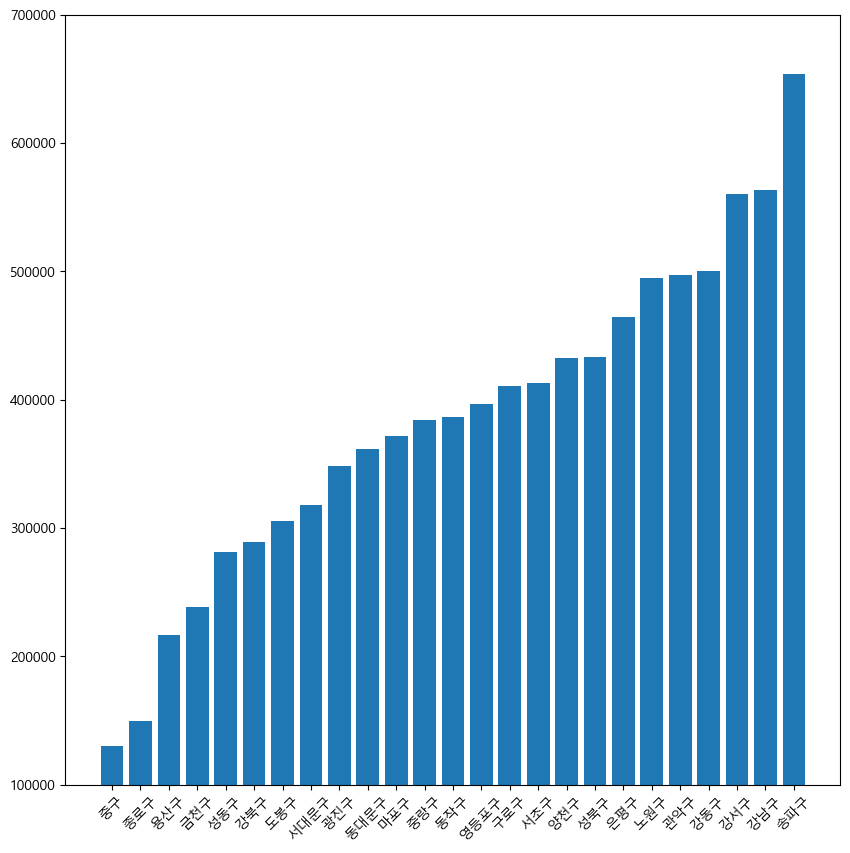

In [13]:
# 2025ÎÖÑ Í∏∞Ï§Ä ÏûêÏπòÍµ¨Î≥Ñ Ïù∏Íµ¨ Ïàò

plt.figure(figsize=(10,10))
plt.bar(sort_gu_population.index, sort_gu_population.values)
plt.ylim(100000,700000)
plt.xticks(rotation = 45)
plt.show()

In [14]:
population['2025 1/4.3'] = pd.to_numeric(population['2025 1/4.3'], errors='coerce')
population.dtypes

ÎèôÎ≥Ñ(1)          object
ÎèôÎ≥Ñ(2)          object
2025 1/4        int64
2025 1/4.1     object
2025 1/4.2     object
2025 1/4.3      int64
2025 1/4.4     object
2025 1/4.5     object
2025 1/4.6     object
2025 1/4.7     object
2025 1/4.8     object
2025 1/4.9     object
2025 1/4.10    object
2025 1/4.11    object
dtype: object

In [15]:
# ÏûêÏπòÍµ¨Î≥Ñ 65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨Ïàò
over65_population = population.groupby('ÎèôÎ≥Ñ(2)')['2025 1/4.3'].sum()
sort_over65_population = over65_population.sort_values()
sort_over65_population

ÎèôÎ≥Ñ(2)
Ï§ëÍµ¨       27148
Ï¢ÖÎ°úÍµ¨      30242
Ïö©ÏÇ∞Íµ¨      39856
Í∏àÏ≤úÍµ¨      48898
ÏÑ±ÎèôÍµ¨      51907
Í¥ëÏßÑÍµ¨      60780
ÎßàÌè¨Íµ¨      60795
ÏÑúÎåÄÎ¨∏Íµ¨     60956
ÏÑúÏ¥àÍµ¨      69429
ÎèôÎåÄÎ¨∏Íµ¨     70498
ÏòÅÎì±Ìè¨Íµ¨     71660
Í∞ïÎ∂ÅÍµ¨      72369
ÎèôÏûëÍµ¨      74258
ÎèÑÎ¥âÍµ¨      75363
ÏñëÏ≤úÍµ¨      81753
ÏÑ±Î∂ÅÍµ¨      84607
Ï§ëÎûëÍµ¨      84905
Íµ¨Î°úÍµ¨      85391
Í¥ÄÏïÖÍµ¨      90299
Í∞ïÎÇ®Íµ¨      92668
Í∞ïÎèôÍµ¨      93581
ÏùÄÌèâÍµ¨      99434
ÎÖ∏ÏõêÍµ¨     101968
Í∞ïÏÑúÍµ¨     109257
ÏÜ°ÌååÍµ¨     115654
Name: 2025 1/4.3, dtype: int64

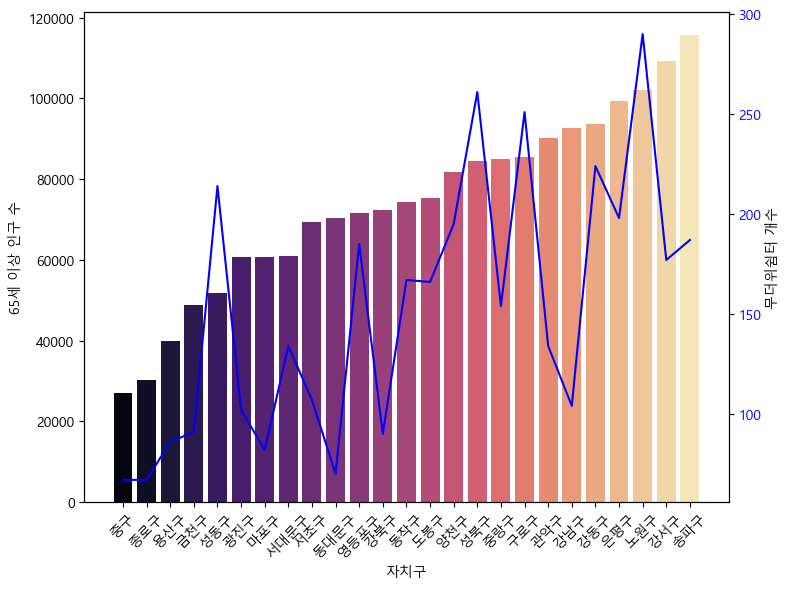

In [16]:
# ÏûêÏπòÍµ¨Î≥Ñ 65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨ ÏàòÍ≥º Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò

# SeriesÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
df_plot1 = sort_over65_population.reset_index()
df_plot1.columns = ['ÏûêÏπòÍµ¨', '65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨ Ïàò'] # Ïª¨Îüº Ïù¥Î¶Ñ ÏòàÏãúÎ°ú Î∞îÍøîÏ§å

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(8,6))
sns.barplot(
    data=df_plot1,
    x='ÏûêÏπòÍµ¨',
    y='65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨ Ïàò',
    hue='ÏûêÏπòÍµ¨', 
    palette = 'magma',
    ax=ax1,
    legend=False
)
plt.xticks(rotation=45)

# SeriesÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
gu_count = gu_count.reset_index()
gu_count.columns = ['ÏûêÏπòÍµ¨', 'Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò']  # Ïª¨Îüº Ïù¥Î¶Ñ Î∞îÍøîÏ§å

ax2 = ax1.twinx()
sns.lineplot(
    data = gu_count,
    x = 'ÏûêÏπòÍµ¨',
    y = 'Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò',
    color = 'blue',
    ax = ax2
)

ax2.tick_params(axis='y', labelcolor='blue')
plt.tight_layout()
plt.show()

In [17]:
df_plot1 = df_plot1.sort_values('ÏûêÏπòÍµ¨')
gu_count = gu_count.sort_values('ÏûêÏπòÍµ¨')
print(type(df_plot1))
print(type(df_plot1))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
# ÏãúÍ∏âÏÑ± ÏßÄÏàò = (Í≥†Î†πÏûê Ïàò / Î¨¥ÎçîÏúÑÏâºÌÑ∞ Ïàò)

# **ÏúÑÌóò**: Î¨¥ÎçîÏúÑÏâºÌÑ∞ Î∂ÄÏ°±Ïù¥ Ïö∞Î†§ÎêòÎ©∞, Í∞úÏÑ§ Ïö∞ÏÑ† Í≤ÄÌÜ†Í∞Ä ÌïÑÏöîÌïú ÏàòÏ§ÄÏûÖÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 600
# **Ï£ºÏùò**: Î¨¥ÎçîÏúÑÏâºÌÑ∞ Î∞ÄÎèÑÎäî Ï§ëÍ∞Ñ ÏàòÏ§ÄÏù¥Î©∞ Ï∂îÍ∞Ä Ï†êÍ≤ÄÏù¥ Í∂åÏû•Îê©ÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 500
# **Î≥¥ÌÜµ**: Ï†ÅÏ†àÌïú Î∂ÑÌè¨Î°ú ÌåêÎã®ÎêòÏßÄÎßå ÏßÄÏó≠ ÎÇ¥ Í∑†Ìòï Ïó¨Î∂Ä ÌôïÏù∏ ÌïÑÏöî. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 400
# **ÏñëÌò∏**: Ïù∏Íµ¨ ÎåÄÎπÑ Ïù∏ÌîÑÎùº ÏàòÏ§ÄÏù¥ Ïö∞ÏàòÌïòÎ©∞, Í∏âÎ∞ïÌïú Ï∂îÍ∞Ä Í∞úÏÑ§ ÌïÑÏöîÎäî ÎÇÆÏäµÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 300

priority_index = gu_count.copy()
priority_index['ÏãúÍ∏âÏÑ± ÏßÄÏàò'] = df_plot1['65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨ Ïàò']/gu_count['Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò']
priority_index.drop('Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò', axis = 1, inplace = True)
priority_index['ÏãúÍ∏âÏÑ± ÏßÄÏàò'] = priority_index['ÏãúÍ∏âÏÑ± ÏßÄÏàò'].round(1)
priority_index

ÏûêÏπòÍµ¨  ÏãúÍ∏âÏÑ± ÏßÄÏàò
8    Í∞ïÎÇ®Íµ¨   667.6
21   Í∞ïÎèôÍµ¨   443.9
5    Í∞ïÎ∂ÅÍµ¨   675.3
15   Í∞ïÏÑúÍµ¨   478.0
10   Í¥ÄÏïÖÍµ¨   534.8
7    Í¥ëÏßÑÍµ¨   597.6
22   Íµ¨Î°úÍµ¨   406.2
6    Í∏àÏ≤úÍµ¨   668.1
24   ÎÖ∏ÏõêÍµ¨   398.8
13   ÎèÑÎ¥âÍµ¨   454.0
2   ÎèôÎåÄÎ¨∏Íµ¨   569.4
14   ÎèôÏûëÍµ¨   489.5
3    ÎßàÌè¨Íµ¨   596.3
11  ÏÑúÎåÄÎ¨∏Íµ¨   540.1
9    ÏÑúÏ¥àÍµ¨   658.9
20   ÏÑ±ÎèôÍµ¨   437.3
23   ÏÑ±Î∂ÅÍµ¨   418.6
17   ÏÜ°ÌååÍµ¨   456.6
18   ÏñëÏ≤úÍµ¨   463.1
16  ÏòÅÎì±Ìè¨Íµ¨   458.9
4    Ïö©ÏÇ∞Íµ¨   603.6
19   ÏùÄÌèâÍµ¨   468.0
1    Ï¢ÖÎ°úÍµ¨   451.4
0     Ï§ëÍµ¨   405.2
12   Ï§ëÎûëÍµ¨   482.2

In [121]:
# **ÏúÑÌóò**: Î¨¥ÎçîÏúÑÏâºÌÑ∞ Î∂ÄÏ°±Ïù¥ Ïö∞Î†§ÎêòÎ©∞, Í∞úÏÑ§ Ïö∞ÏÑ† Í≤ÄÌÜ†Í∞Ä ÌïÑÏöîÌïú ÏàòÏ§ÄÏûÖÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 600
# **Ï£ºÏùò**: Î¨¥ÎçîÏúÑÏâºÌÑ∞ Î∞ÄÎèÑÎäî Ï§ëÍ∞Ñ ÏàòÏ§ÄÏù¥Î©∞ Ï∂îÍ∞Ä Ï†êÍ≤ÄÏù¥ Í∂åÏû•Îê©ÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 500
# **Î≥¥ÌÜµ**: Ï†ÅÏ†àÌïú Î∂ÑÌè¨Î°ú ÌåêÎã®ÎêòÏßÄÎßå ÏßÄÏó≠ ÎÇ¥ Í∑†Ìòï Ïó¨Î∂Ä ÌôïÏù∏ ÌïÑÏöî. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 400
# **ÏñëÌò∏**: Ïù∏Íµ¨ ÎåÄÎπÑ Ïù∏ÌîÑÎùº ÏàòÏ§ÄÏù¥ Ïö∞ÏàòÌïòÎ©∞, Í∏âÎ∞ïÌïú Ï∂îÍ∞Ä Í∞úÏÑ§ ÌïÑÏöîÎäî ÎÇÆÏäµÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 300

priority_index['code'] = pd.cut(
    priority_index['ÏãúÍ∏âÏÑ± ÏßÄÏàò'],
    bins=[299.9, 399.9, 499.9, 599.9, np.inf],
    labels=['ÏñëÌò∏','Î≥¥ÌÜµ', 'Ï£ºÏùò', 'ÏúÑÌóò']
)
priority_index

ÏûêÏπòÍµ¨  ÏãúÍ∏âÏÑ± ÏßÄÏàò code
8    Í∞ïÎÇ®Íµ¨   667.6   ÏúÑÌóò
21   Í∞ïÎèôÍµ¨   443.9   Î≥¥ÌÜµ
5    Í∞ïÎ∂ÅÍµ¨   675.3   ÏúÑÌóò
15   Í∞ïÏÑúÍµ¨   478.0   Î≥¥ÌÜµ
10   Í¥ÄÏïÖÍµ¨   534.8   Ï£ºÏùò
7    Í¥ëÏßÑÍµ¨   597.6   Ï£ºÏùò
22   Íµ¨Î°úÍµ¨   406.2   Î≥¥ÌÜµ
6    Í∏àÏ≤úÍµ¨   668.1   ÏúÑÌóò
24   ÎÖ∏ÏõêÍµ¨   398.8   ÏñëÌò∏
13   ÎèÑÎ¥âÍµ¨   454.0   Î≥¥ÌÜµ
2   ÎèôÎåÄÎ¨∏Íµ¨   569.4   Ï£ºÏùò
14   ÎèôÏûëÍµ¨   489.5   Î≥¥ÌÜµ
3    ÎßàÌè¨Íµ¨   596.3   Ï£ºÏùò
11  ÏÑúÎåÄÎ¨∏Íµ¨   540.1   Ï£ºÏùò
9    ÏÑúÏ¥àÍµ¨   658.9   ÏúÑÌóò
20   ÏÑ±ÎèôÍµ¨   437.3   Î≥¥ÌÜµ
23   ÏÑ±Î∂ÅÍµ¨   418.6   Î≥¥ÌÜµ
17   ÏÜ°ÌååÍµ¨   456.6   Î≥¥ÌÜµ
18   ÏñëÏ≤úÍµ¨   463.1   Î≥¥ÌÜµ
16  ÏòÅÎì±Ìè¨Íµ¨   458.9   Î≥¥ÌÜµ
4    Ïö©ÏÇ∞Íµ¨   603.6   ÏúÑÌóò
19   ÏùÄÌèâÍµ¨   468.0   Î≥¥ÌÜµ
1    Ï¢ÖÎ°úÍµ¨   451.4   Î≥¥ÌÜµ
0     Ï§ëÍµ¨   405.2   Î≥¥ÌÜµ
12   Ï§ëÎûëÍµ¨   482.2   Î≥¥ÌÜµ

In [20]:
silver_hall = []
center = []
bank = []
library = []
church = []
sarangbang = []
welfare = []
green_smart = []

shelter_type = []

for i in df1['ÏâºÌÑ∞Î™ÖÏπ≠']:
    if 'Í≤ΩÎ°úÎãπ' in i:
        silver_hall.append(i)
    elif 'Ï£ºÎØºÏÑºÌÑ∞' in i:
        center.append(i)
    elif 'ÏùÄÌñâ' in i or 'Í∏àÍ≥†' in i:
        bank.append(i)
    elif 'ÎèÑÏÑúÍ¥Ä' in i:
        library.append(i)
    elif 'ÍµêÌöå' in i:
        church.append(i)
    elif 'ÏÇ¨ÎûëÎ∞©' in i:
        sarangbang.append(i)
    elif 'Î≥µÏßÄ' in i:
        welfare.append(i)
    elif 'Í∑∏Î¶∞Ïä§ÎßàÌä∏' in i:
        green_smart.append(i)
        

shelter_num = len(df1['ÏâºÌÑ∞Î™ÖÏπ≠'])

shelter_type.append(len(silver_hall)/shelter_num *100)
shelter_type.append(len(center)/shelter_num *100)
shelter_type.append(len(bank)/shelter_num *100)
shelter_type.append(len(library)/shelter_num *100)
shelter_type.append(len(church)/shelter_num *100)
shelter_type.append(len(sarangbang)/shelter_num *100)
shelter_type.append(len(welfare)/shelter_num *100)
shelter_type.append(len(green_smart)/shelter_num *100)

df3 = pd.DataFrame(shelter_type)
df3.index = ['Í≤ΩÎ°úÎãπ','Ï£ºÎØºÏÑºÌÑ∞','ÏùÄÌñâ','ÎèÑÏÑúÍ¥Ä','ÍµêÌöå','ÏÇ¨ÎûëÎ∞©','Î≥µÏßÄÍ¥Ä','Í∑∏Î¶∞Ïä§ÎßàÌä∏ ÏâºÌÑ∞']
df3

0
Í≤ΩÎ°úÎãπ       68.077833
Ï£ºÎØºÏÑºÌÑ∞      11.175388
ÏùÄÌñâ         2.734683
ÎèÑÏÑúÍ¥Ä        2.208783
ÍµêÌöå         0.157770
ÏÇ¨ÎûëÎ∞©        2.708388
Î≥µÏßÄÍ¥Ä        4.838286
Í∑∏Î¶∞Ïä§ÎßàÌä∏ ÏâºÌÑ∞   0.841441

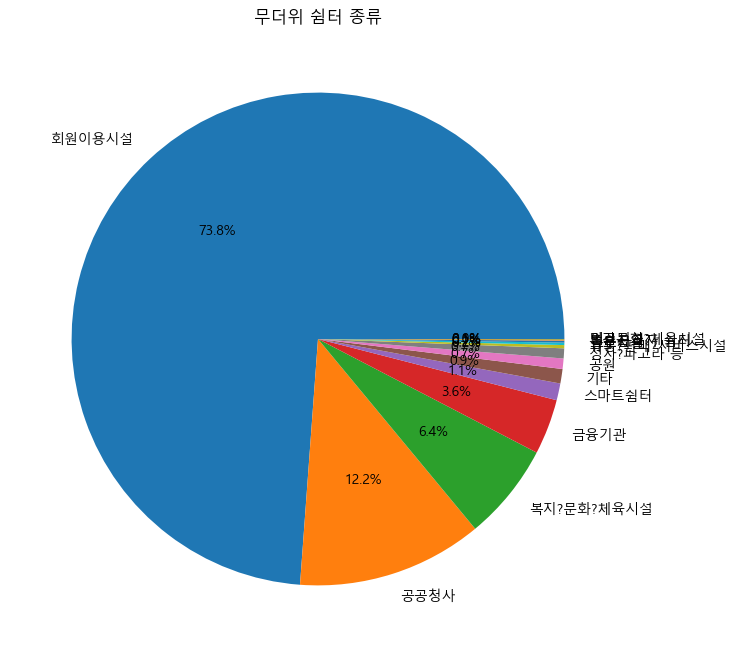

In [61]:
category = df1.iloc[:, 1]
counts = category.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Î¨¥ÎçîÏúÑ ÏâºÌÑ∞ Ï¢ÖÎ•ò')
plt.show()

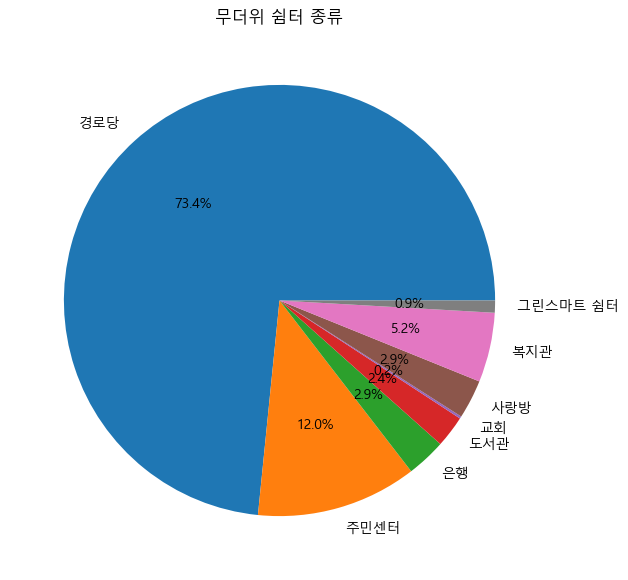

In [21]:
# 2. Î¨¥ÎçîÏúÑÏâºÌÑ∞ Ï¢ÖÎ•òÍ∞Ä Îã§ÏñëÌï† Í≤ÉÏù¥Îã§.
# ÏïÑÎãò. Í≤ΩÎ°úÎãπÏù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùå.

plt.figure(figsize=(7,7))
plt.pie(shelter_type,
        labels = df3.index,
        autopct='%1.1f%%')

plt.title('Î¨¥ÎçîÏúÑ ÏâºÌÑ∞ Ï¢ÖÎ•ò')
plt.show()

In [22]:
gu_count

ÏûêÏπòÍµ¨  Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò
8    Í∞ïÎÇ®Íµ¨       104
21   Í∞ïÎèôÍµ¨       224
5    Í∞ïÎ∂ÅÍµ¨        90
15   Í∞ïÏÑúÍµ¨       177
10   Í¥ÄÏïÖÍµ¨       134
7    Í¥ëÏßÑÍµ¨       102
22   Íµ¨Î°úÍµ¨       251
6    Í∏àÏ≤úÍµ¨        91
24   ÎÖ∏ÏõêÍµ¨       290
13   ÎèÑÎ¥âÍµ¨       166
2   ÎèôÎåÄÎ¨∏Íµ¨        70
14   ÎèôÏûëÍµ¨       167
3    ÎßàÌè¨Íµ¨        82
11  ÏÑúÎåÄÎ¨∏Íµ¨       134
9    ÏÑúÏ¥àÍµ¨       107
20   ÏÑ±ÎèôÍµ¨       214
23   ÏÑ±Î∂ÅÍµ¨       261
17   ÏÜ°ÌååÍµ¨       187
18   ÏñëÏ≤úÍµ¨       195
16  ÏòÅÎì±Ìè¨Íµ¨       185
4    Ïö©ÏÇ∞Íµ¨        86
19   ÏùÄÌèâÍµ¨       198
1    Ï¢ÖÎ°úÍµ¨        67
0     Ï§ëÍµ¨        67
12   Ï§ëÎûëÍµ¨       154

In [147]:
%%writefile module/minipro1.py

import streamlit as st
import folium
import geopandas as gpd
import streamlit_folium as sf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

df1 = pd.read_csv('data/ÏÑúÏö∏Ïãú Î¨¥ÎçîÏúÑÏâºÌÑ∞.csv')
population = pd.read_csv('data/Í≥†Î†πÏûêÌòÑÌô©_20250720105739.csv')

gu = []
for i in df1['ÏßÄÎ≤àÏ£ºÏÜå']:
    i = i.split(' ')[1]
    gu.append(i)
df1['ÏûêÏπòÍµ¨'] = gu
df1.drop('ÏßÄÎ≤àÏ£ºÏÜå', axis = 1 ,inplace=True)

gu_count = df1['ÏûêÏπòÍµ¨'].value_counts()
gu_count = gu_count.sort_values()

st.header('Îç∞Ïù¥ÌÑ∞Î°ú Î≥∏ ÏÑúÏö∏Ïãú Î¨¥ÎçîÏúÑÏâºÌÑ∞ ÌòÑÏã§üìä')

# ====================================ÌÉ≠ Ï†úÏûë===============================

tab1, tab2,tab3, tab4 = st.tabs(['Í∞ÄÏÑ§2','Í∞ÄÏÑ§3','Í∞ÄÏÑ§4','ÏàòÏπòÌôî2'])
    
# =================================Í∞ÄÏÑ§2(ÌååÏù¥Ï∞®Ìä∏ 2Í∞ú)========================
with tab1:
    col1, col2 = st.columns(2)
    with col1:
        st.subheader('Î¨¥ÎçîÏúÑÏâºÌÑ∞ Ïú†Ìòï Î∂ÑÎ•ò', divider = 'orange')
        
        category = df1.iloc[:, 2]
        counts = category.value_counts()
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
        ax.set_title('Î¨¥ÎçîÏúÑ ÏâºÌÑ∞ Ï¢ÖÎ•ò')
        st.pyplot(fig)
        
    with col2:
        st.subheader('Î¨¥ÎçîÏúÑÏâºÌÑ∞ ÏÑ∏Î∂Ä Ïú†Ìòï', divider = 'orange')
        silver_hall = []
        center = []
        bank = []
        library = []
        church = []
        sarangbang = []
        welfare = []
        green_smart = []
        
        shelter_type = []
        
        for i in df1['ÏâºÌÑ∞Î™ÖÏπ≠']:
            if 'Í≤ΩÎ°úÎãπ' in i:
                silver_hall.append(i)
            elif 'Ï£ºÎØºÏÑºÌÑ∞' in i:
                center.append(i)
            elif 'ÏùÄÌñâ' in i or 'Í∏àÍ≥†' in i:
                bank.append(i)
            elif 'ÎèÑÏÑúÍ¥Ä' in i:
                library.append(i)
            elif 'ÍµêÌöå' in i:
                church.append(i)
            elif 'ÏÇ¨ÎûëÎ∞©' in i:
                sarangbang.append(i)
            elif 'Î≥µÏßÄ' in i:
                welfare.append(i)
            elif 'Í∑∏Î¶∞Ïä§ÎßàÌä∏' in i:
                green_smart.append(i)
                
        
        shelter_num = len(df1['ÏâºÌÑ∞Î™ÖÏπ≠'])
        
        shelter_type.append(len(silver_hall)/shelter_num *100)
        shelter_type.append(len(center)/shelter_num *100)
        shelter_type.append(len(bank)/shelter_num *100)
        shelter_type.append(len(library)/shelter_num *100)
        shelter_type.append(len(church)/shelter_num *100)
        shelter_type.append(len(sarangbang)/shelter_num *100)
        shelter_type.append(len(welfare)/shelter_num *100)
        shelter_type.append(len(green_smart)/shelter_num *100)
        
        df3 = pd.DataFrame(shelter_type)
        df3.index = ['Í≤ΩÎ°úÎãπ','Ï£ºÎØºÏÑºÌÑ∞','ÏùÄÌñâ','ÎèÑÏÑúÍ¥Ä','ÍµêÌöå','ÏÇ¨ÎûëÎ∞©','Î≥µÏßÄÍ¥Ä','Í∑∏Î¶∞Ïä§ÎßàÌä∏ ÏâºÌÑ∞']
        fig, ax = plt.subplots(figsize=(7,7))
        ax.pie(shelter_type,
                labels = df3.index,
                autopct='%1.1f%%')
        
        ax.set_title('Î¨¥ÎçîÏúÑ ÏâºÌÑ∞ Ï¢ÖÎ•ò')
        st.pyplot(fig)
    
# =================================Í∞ÄÏÑ§3(Î∞î Ï∞®Ìä∏, ÏßÄÎèÑ)========================
with tab2:
    col1, col2 = st.columns(2)
    with col1:
        st.subheader('ÏûêÏπòÍµ¨Î≥Ñ Î¨¥ÎçîÏúÑÏâºÌÑ∞ Ïàò', divider = 'orange')
        plt.figure(figsize=(10,10))
        plt.bar(gu_count.index, gu_count)
        plt.ylim(0,300)
        plt.xticks(rotation = 45)
        plt.xlabel('ÏûêÏπòÍµ¨')
        plt.ylabel('Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò')
        st.pyplot(plt)
    with col2:
# ===========================ÏßÄÎèÑÏóê ÌëúÏãú===============================
# ÏÑúÏö∏ ÏûêÏπòÍµ¨ GeoJSON ÌååÏùº ÏùΩÍ∏∞
        st.subheader('ÏûêÏπòÍµ¨Î≥Ñ Î¨¥ÎçîÏúÑÏâºÌÑ∞ Ïàò ÏßÄÎèÑ', divider = 'orange')
        geo_path = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"  # GeoJSON ÌååÏùº Í≤ΩÎ°ú
        geo_data = gpd.read_file(geo_path)
        gu_count_df = df1['ÏûêÏπòÍµ¨'].value_counts().reset_index()
        gu_count_df.columns = ['ÏûêÏπòÍµ¨', 'Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò']
        data = gu_count_df.copy()
        
        # ÏÑúÏö∏Ïùò ÏúÑÎèÑ, Í≤ΩÎèÑ: 37.5665, 126.9780
        seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=10, tiles='CartoDB positron')
        
        # 3. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (GeoJSON + Í±∞ÏπòÎåÄ Í∞úÏàò Îç∞Ïù¥ÌÑ∞)
        geo_data = geo_data.merge(data, left_on='name', right_on='ÏûêÏπòÍµ¨') 
        # 'name' Ïª¨ÎüºÏùÄ GeoJSON ÌååÏùºÏùò ÏûêÏπòÍµ¨ Ïù¥Î¶Ñ Ïª¨Îüº
        
        # folium.Choropleth ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©
        # Choropleth Îßµ: ÏßÄÏó≠Î≥ÑÎ°ú ÏÉâÏÉÅÏùÑ Îã§Î•¥Í≤å ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÎäî ÏßÄÎèÑ
        folium.Choropleth(
            geo_data=geo_data,
            name="choropleth",
            data=gu_count,
            columns=['ÏûêÏπòÍµ¨', 'Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò'],
            key_on='feature.properties.name', # GeoJSON Îç∞Ïù¥ÌÑ∞ÏôÄ dataÏùò ÏûêÏπòÍµ¨ Ï†ïÎ≥¥Î•º Ïó∞Í≤∞
            fill_color='YlGnBu',  # ÏÉâÏÉÅ Ïä§ÏºÄÏùº
            fill_opacity=0.7,
            line_opacity=0.5,
            legend_name='Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò'
        ).add_to(seoul_map)
        
        for _, row in geo_data.iterrows(): # geo_data ÏàúÌöåÌïòÎ©¥ÏÑú Í∞Å Ìñâ(row)ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú 
            folium.GeoJson(
                row['geometry'],  # GeoJSON ÌòïÏãùÏùò geometry Îç∞Ïù¥ÌÑ∞
                name=row['name'],
                tooltip=folium.Tooltip(f"{row['name']}: {row['Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò']}Í∞ú"),  # TooltipÏóê ÌëúÏãúÎêòÎäî ÎÇ¥Ïö©
                popup=folium.Popup(f"{row['name']}<br>ÏâºÌÑ∞ Í∞úÏàò: {row['Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò']}Í∞ú", 
                                  max_width=300)  # Popup Ï∂îÍ∞Ä
            ).add_to(seoul_map)
            
        sf.st_folium(seoul_map, width = 300, height=300)
# ======================================Í∞ÄÏÑ§4(Ïù¥Ï§ëÏ∞®Ìä∏)============================
with tab3:
    st.subheader('ÏûêÏπòÍµ¨Î≥Ñ Í≥†Î†πÏûêÏàòÏôÄ Î¨¥ÎçîÏúÑÏâºÌÑ∞ Ïàò', divider = 'orange')
    df1 = pd.read_csv('data/ÏÑúÏö∏Ïãú Î¨¥ÎçîÏúÑÏâºÌÑ∞.csv')
    population = pd.read_csv('data/Í≥†Î†πÏûêÌòÑÌô©_20250720105739.csv')
    gu = []
    for i in df1['ÏßÄÎ≤àÏ£ºÏÜå']:
        i = i.split(' ')[1]
        gu.append(i)
    df1['ÏûêÏπòÍµ¨'] = gu
    df1.drop('ÏßÄÎ≤àÏ£ºÏÜå', axis = 1 ,inplace=True)
    
    gu_count = df1['ÏûêÏπòÍµ¨'].value_counts()
    gu_count = gu_count.sort_values()
    population.drop(population.index[0:4], inplace = True)
    
    population['2025 1/4.3'] = pd.to_numeric(population['2025 1/4.3'], errors='coerce')
    over65_population = population.groupby('ÎèôÎ≥Ñ(2)')['2025 1/4.3'].sum()
    sort_over65_population = over65_population.sort_values()
    
    df_plot1 = sort_over65_population.reset_index()
    df_plot1.columns = ['ÏûêÏπòÍµ¨', '65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨ Ïàò'] # Ïª¨Îüº Ïù¥Î¶Ñ ÏòàÏãúÎ°ú Î∞îÍøîÏ§å
    
    # ÏãúÍ∞ÅÌôî
    fig, ax1 = plt.subplots(figsize=(8,6))
    sns.barplot(
        data=df_plot1,
        x='ÏûêÏπòÍµ¨',
        y='65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨ Ïàò',
        hue='ÏûêÏπòÍµ¨', 
        palette = 'magma',
        ax=ax1,
        legend=False
    )
    plt.xticks(rotation=45)
    
    # SeriesÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
    gu_count = gu_count.reset_index()
    gu_count.columns = ['ÏûêÏπòÍµ¨', 'Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò']  # Ïª¨Îüº Ïù¥Î¶Ñ Î∞îÍøîÏ§å
    
    ax2 = ax1.twinx()
    sns.lineplot(
        data = gu_count,
        x = 'ÏûêÏπòÍµ¨',
        y = 'Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò',
        color = 'blue',
        ax = ax2
    )
    
    ax2.tick_params(axis='y', labelcolor='blue')
    plt.tight_layout()
    st.pyplot(fig)
# ================================ÏàòÏπòÌôî2=========================================
with tab4:
    st.subheader('Í∞Å ÏûêÏπòÍµ¨Î≥Ñ Ïù∏Íµ¨Ïàò ÎåÄÎπÑ Î¨¥ÎçîÏúÑ ÏâºÌÑ∞ Í∞úÏàò ÏàòÏπòÌôî2', divider = 'orange')
    with st.expander("ÏúÑÌóò Îì±Í∏â Í∏∞Ï§Ä ÏïàÎÇ¥"):
        st.markdown("""
        - **ÏúÑÌóò**: Î¨¥ÎçîÏúÑÏâºÌÑ∞ Î∂ÄÏ°±Ïù¥ Ïö∞Î†§ÎêòÎ©∞, Í∞úÏÑ§ Ïö∞ÏÑ† Í≤ÄÌÜ†Í∞Ä ÌïÑÏöîÌïú ÏàòÏ§ÄÏûÖÎãàÎã§.
        - **Ï£ºÏùò**: Î¨¥ÎçîÏúÑÏâºÌÑ∞ Î∞ÄÎèÑÎäî Ï§ëÍ∞Ñ ÏàòÏ§ÄÏù¥Î©∞ Ï∂îÍ∞Ä Ï†êÍ≤ÄÏù¥ Í∂åÏû•Îê©ÎãàÎã§.
        - **Î≥¥ÌÜµ**: Ï†ÅÏ†àÌïú Î∂ÑÌè¨Î°ú ÌåêÎã®ÎêòÏßÄÎßå ÏßÄÏó≠ ÎÇ¥ Í∑†Ìòï Ïó¨Î∂Ä ÌôïÏù∏ ÌïÑÏöî.
        - **ÏñëÌò∏**: Ïù∏Íµ¨ ÎåÄÎπÑ Ïù∏ÌîÑÎùº ÏàòÏ§ÄÏù¥ Ïö∞ÏàòÌïòÎ©∞, Í∏âÎ∞ïÌïú Ï∂îÍ∞Ä Í∞úÏÑ§ ÌïÑÏöîÎäî ÎÇÆÏäµÎãàÎã§.
        """)

    df_plot1 = df_plot1.sort_values('ÏûêÏπòÍµ¨')
    gu_count = gu_count.sort_values('ÏûêÏπòÍµ¨')
    priority_index = gu_count.copy()
    priority_index['ÏãúÍ∏âÏÑ± ÏßÄÏàò'] = df_plot1['65ÏÑ∏ Ïù¥ÏÉÅ Ïù∏Íµ¨ Ïàò']/gu_count['Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò']
    priority_index.drop('Î¨¥ÎçîÏúÑÏâºÌÑ∞ Í∞úÏàò', axis = 1, inplace = True)
    priority_index['ÏãúÍ∏âÏÑ± ÏßÄÏàò'] = priority_index['ÏãúÍ∏âÏÑ± ÏßÄÏàò'].round(1)

    priority_index['ÏúÑÌóò Îì±Í∏â'] = pd.cut(
    priority_index['ÏãúÍ∏âÏÑ± ÏßÄÏàò'],
    bins=[299.9, 399.9, 499.9, 599.9, np.inf],
    labels=['ÏñëÌò∏','Î≥¥ÌÜµ', 'Ï£ºÏùò', 'ÏúÑÌóò']
    )

    geo_path = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"  # GeoJSON ÌååÏùº Í≤ΩÎ°ú
    geo_data = gpd.read_file(geo_path)
    gu_count_df = df1['ÏûêÏπòÍµ¨'].value_counts().reset_index()
    gu_count_df.columns = ['ÏûêÏπòÍµ¨', 'ÏãúÍ∏âÏÑ± ÏßÄÏàò']
    data = priority_index.copy()
    
    # ÏÑúÏö∏Ïùò ÏúÑÎèÑ, Í≤ΩÎèÑ: 37.5665, 126.9780
    seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=10, tiles='CartoDB positron')
    
    # 3. Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (GeoJSON + Í±∞ÏπòÎåÄ Í∞úÏàò Îç∞Ïù¥ÌÑ∞)
    geo_data = geo_data.merge(data, left_on='name', right_on='ÏûêÏπòÍµ¨') 
    # 'name' Ïª¨ÎüºÏùÄ GeoJSON ÌååÏùºÏùò ÏûêÏπòÍµ¨ Ïù¥Î¶Ñ Ïª¨Îüº
    
    # folium.Choropleth ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©
    # Choropleth Îßµ: ÏßÄÏó≠Î≥ÑÎ°ú ÏÉâÏÉÅÏùÑ Îã§Î•¥Í≤å ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÎäî ÏßÄÎèÑ
    folium.Choropleth(
        geo_data=geo_data,
        name="choropleth",
        data=priority_index,
        columns=['ÏûêÏπòÍµ¨', 'ÏãúÍ∏âÏÑ± ÏßÄÏàò'],
        key_on='feature.properties.name', # GeoJSON Îç∞Ïù¥ÌÑ∞ÏôÄ dataÏùò ÏûêÏπòÍµ¨ Ï†ïÎ≥¥Î•º Ïó∞Í≤∞
        fill_color='Reds',  # ÏÉâÏÉÅ Ïä§ÏºÄÏùº
        line_color='black',
        fill_opacity=0.7,
        line_opacity=0.5,
        legend_name='ÏãúÍ∏âÏÑ± ÏßÄÏàò'
    ).add_to(seoul_map)
    
    for _, row in geo_data.iterrows(): # geo_data ÏàúÌöåÌïòÎ©¥ÏÑú Í∞Å Ìñâ(row)ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú 
        folium.GeoJson(
            row['geometry'],  # GeoJSON ÌòïÏãùÏùò geometry Îç∞Ïù¥ÌÑ∞
            name=row['name'],
            tooltip=folium.Tooltip(f"{row['name']}: {row['ÏúÑÌóò Îì±Í∏â']}"),  # TooltipÏóê ÌëúÏãúÎêòÎäî ÎÇ¥Ïö©
            popup=folium.Popup(f"{row['name']}<br>ÏãúÍ∏âÏÑ± ÏßÄÏàò: {row['ÏãúÍ∏âÏÑ± ÏßÄÏàò']}", 
                              max_width=300)  # Popup Ï∂îÍ∞Ä
        ).add_to(seoul_map)
    sf.st_folium(seoul_map, width = 600, height=600)

Overwriting module/minipro1.py


In [25]:
# **ÏúÑÌóò**: Î¨¥ÎçîÏúÑÏâºÌÑ∞ Î∂ÄÏ°±Ïù¥ Ïö∞Î†§ÎêòÎ©∞, Í∞úÏÑ§ Ïö∞ÏÑ† Í≤ÄÌÜ†Í∞Ä ÌïÑÏöîÌïú ÏàòÏ§ÄÏûÖÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 600
# **Ï£ºÏùò**: Î¨¥ÎçîÏúÑÏâºÌÑ∞ Î∞ÄÎèÑÎäî Ï§ëÍ∞Ñ ÏàòÏ§ÄÏù¥Î©∞ Ï∂îÍ∞Ä Ï†êÍ≤ÄÏù¥ Í∂åÏû•Îê©ÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 500
# **Î≥¥ÌÜµ**: Ï†ÅÏ†àÌïú Î∂ÑÌè¨Î°ú ÌåêÎã®ÎêòÏßÄÎßå ÏßÄÏó≠ ÎÇ¥ Í∑†Ìòï Ïó¨Î∂Ä ÌôïÏù∏ ÌïÑÏöî. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 400
# **ÏñëÌò∏**: Ïù∏Íµ¨ ÎåÄÎπÑ Ïù∏ÌîÑÎùº ÏàòÏ§ÄÏù¥ Ïö∞ÏàòÌïòÎ©∞, Í∏âÎ∞ïÌïú Ï∂îÍ∞Ä Í∞úÏÑ§ ÌïÑÏöîÎäî ÎÇÆÏäµÎãàÎã§. ÏãúÍ∏âÏÑ± ÏßÄÏàò >= 300